# Download the Data

The easiest way to get the data is to download the data from here using your browser:
https://drive.google.com/uc?export=download

We aren't doing this with python because its cumbersome to overcome google's filesize warning.  Place the zip file in this folder before continuing.

In [2]:
# unzip the files
import zipfile
with zipfile.ZipFile('dataset-resized.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [6]:
# take a look inside the new folder
import os

data_path = 'dataset-resized'
categories = os.listdir(data_path)
categories

['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

In [7]:
# count the number of images in each category
image_paths = {}
for cat in categories:
    image_paths[cat] = os.listdir(os.path.join(data_path,cat))
    print('There are', len(os.listdir(os.path.join(data_path,cat))), 
          cat, 
          'images' )
    

There are 594 paper images
There are 410 metal images
There are 403 cardboard images
There are 137 trash images
There are 501 glass images
There are 482 plastic images


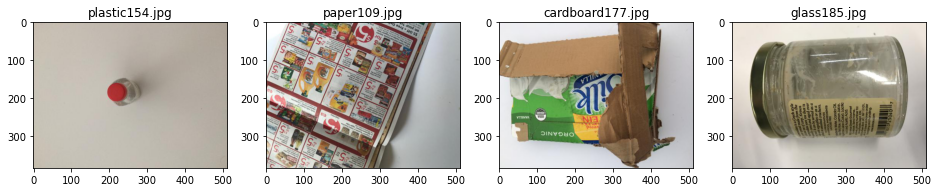

In [8]:
# take a look at some of the images
# inspect random images

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from tensorflow.keras.preprocessing.image import load_img

fig, axs = plt.subplots(1,4, figsize=(16,4))
                        
for ax in axs:
    # choose a random category
    cat = np.random.choice(categories)
    
    # choose a random image in that category
    file_name = np.random.choice(os.listdir(os.path.join(data_path,cat)))
    
    # load and display the image
    img = load_img(os.path.join(data_path,cat,file_name))
    ax.imshow(img)
    ax.set_title(file_name)

# Split into training and validation sets

In [22]:
split_base = 'data-split'

os.mkdir(split_base)

# store the path of each folder and create directories
train_folder = os.path.join(split_base, 'train')
os.mkdir(train_folder)

test_folder = os.path.join(split_base, 'test')
os.mkdir(test_folder)

In [23]:
import shutil

# portion of images to be used for testing
test_portion = 0.05

# Split the data into training, validation, and split folders
for cat in categories:
    # get total number of files in this category
    num_files = len(image_paths[cat])
    
    # randomize the file order for this category
    np.random.shuffle(image_paths[cat])
    
    # set split boundries for validation and test
    test_boundry = int(np.floor(num_files * test_portion))
        
    # store boundries
    labels = {'test': image_paths[cat][:test_boundry],
              'train': image_paths[cat][test_boundry:]}
    
    # loop through boundries and move copy files
    for label, files in labels.items():
        # create folder
        os.mkdir(os.path.join(split_base, label, cat))
        
        # copy files to the correct directory
        for file in files:
            shutil.copyfile(os.path.join(data_path, cat, file),
                            os.path.join(split_base, label, cat, file))
